In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import random
import pylab as pl
import importer
from total import Tag,count,type_list,Inverse_Transform_Sampling
from mcs_of_miles_driven_perday import R_km,R_km_list
from model_of_charing_mode import scm_list

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号 

## 1. 充电量的蒙特卡洛模拟
- EC[0:3]：为各车型的百公里耗电量

In [9]:
EC=[20.5,140,20.5,20.5]

cc_list = []
for i in range(4):
    cc_list.append(np.array(R_km_list[i]) * EC[i] / 100)

cc = np.zeros(shape=count)
for i in range(4):
    for j, car_index in enumerate(type_list[i]):
        cc[car_index] = cc_list[i][j]

len(cc_list[2]),cc_list[1][0:10],len(cc)

(2626,
 array([145.6,  61.6, 121.8, 144.2, 114.8,  86.8, 148.4, 135.8, 159.6,
         88.2]),
 10000)

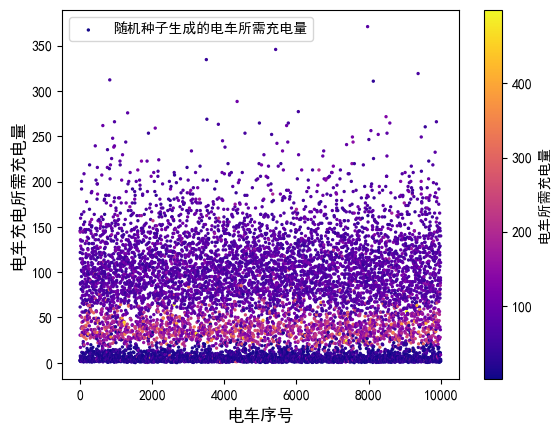

In [10]:
x = range(0, count)
plt.scatter(x, cc, s=2, marker='o', c=R_km, cmap='plasma', label="随机种子生成的电车所需充电量")
plt.xlabel("电车序号", fontsize=12)
plt.ylabel("电车充电所需充电量", fontsize=12)
plt.colorbar(label='电车所需充电量')
plt.legend(prop={'size': 10})
plt.show()              

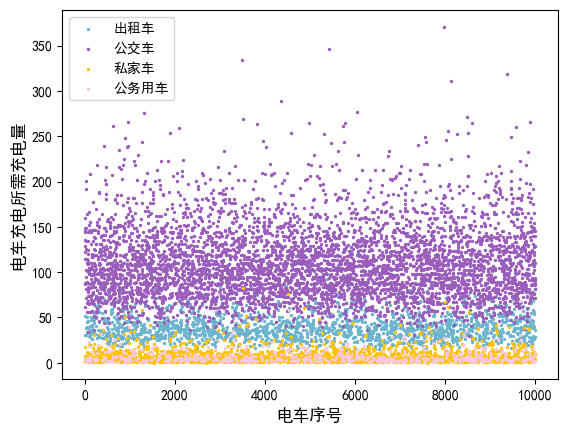

In [11]:
color=['#6CB4CE','#9B5DBC','#FFC300','#F7C8E0']
for i in range(0,4):
    plt.scatter(type_list[i],cc_list[i],s=2,marker='o',color=color[i],label=Tag[i])
plt.xlabel("电车序号", fontsize=12)
plt.ylabel("电车充电所需充电量", fontsize=12)
plt.legend(prop={'size': 10})
plt.show()

## 2. 充电时长的蒙特卡洛模拟
- CP:充电功率,row 0代表普充，row 1代表快充
- cs:代表充电时长

In [12]:
CP = [[7, 60, 7, 7], [60, 108, 60, 60]]

cs_list = [[], [], [], []]
for i in range(4):
    for j in range(len(cc_list[i])):
        cs_list[i].append(cc_list[i][j] / CP[scm_list[i][j]][i])

cs = np.zeros(shape=count)
for i in range(4):
    for j, car_index in enumerate(type_list[i]):
        cs[car_index] = cs_list[i][j] 


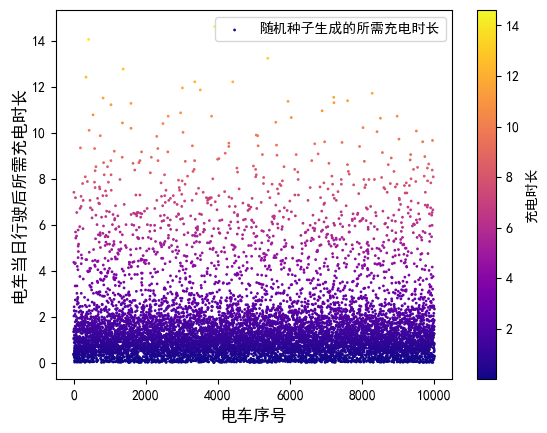

In [13]:
x = range(0, count)
plt.scatter(x,cs,s=1,c=cs,cmap='plasma',label="随机种子生成的所需充电时长")
plt.xlabel("电车序号", fontsize=12)
plt.ylabel("电车当日行驶后所需充电时长", fontsize=12)
plt.colorbar(label='充电时长')
plt.legend(prop={'size': 10})
plt.show()

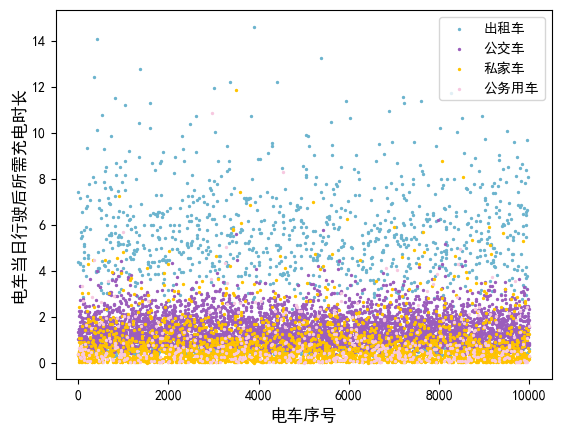

In [14]:
color=['#6CB4CE','#9B5DBC','#FFC300','#F7C8E0']
for i in range(0,4):
    plt.scatter(type_list[i],cs_list[i],s=2,marker='o',color=color[i],label=Tag[i])
plt.xlabel("电车序号", fontsize=12)
plt.ylabel("电车当日行驶后所需充电时长", fontsize=12)
plt.legend(prop={'size': 10})
plt.show()